# GDD calculation comparison

### Bring in Python modules ###

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Open and read model output files ###

In [43]:
swb_results = pd.read_csv("../output/SWB2_variable_values__col_115__row_319__x_555602__y_434644.csv", skipinitialspace=True)
gdd_hprcc = pd.read_csv("../../../test_data/cs/integration_test_dataset__gdd__high_plains_regional_climate_center.csv", comment="#", skipinitialspace=True)

gdd_hprcc.columns = ['year','month','day','gdd']
gdd_hprcc['yearstr'] = gdd_hprcc.loc[:,'year']
gdd_hprcc['year'] = pd.to_numeric(gdd_hprcc.loc[:,'yearstr'], errors='coerce')
gdd_hprcc['date'] = pd.to_datetime(gdd_hprcc.loc[:,'year':'day'],unit='D')

gdd_2012 = gdd_hprcc.loc[gdd_hprcc.year == 2012,:]
gdd_2013 = gdd_hprcc.loc[gdd_hprcc.year == 2013,:]

swb_results['date'] = pd.to_datetime(swb_results.loc[:,'month':'year'], unit='D')

## Plots and Comparisons ##
### Plot of Soil-Water-Balance Model output ###

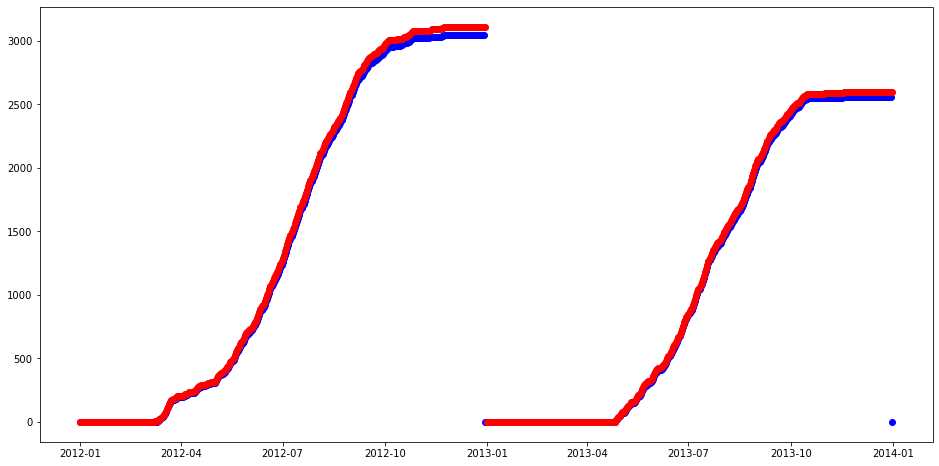

In [42]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot_date(x=swb_results.loc[:,'date'].values,y=swb_results.loc[:,'gdd'].values, c='blue')
ax.plot_date(x=gdd_2012.loc[:,'date'].values,y=gdd_2012.loc[:,'gdd'].values, c='red')
ax.plot_date(x=gdd_2013.loc[:,'date'].values,y=gdd_2013.loc[:,'gdd'].values, c='red')

plt.show()
